In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, SpectralClustering
from sklearn.decomposition import PCA
from scipy.spatial.distance import squareform, pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [64]:
# Get np array of solutions for testing
solutions = []
for file in os.listdir('solutions_beats_5_enemies'):
    if file.startswith('pymoo'):
        new_solution = []
        with open(f'solutions_beats_5_enemies/{file}') as f:
            solutions.append(f.read().splitlines())
            
solutions = np.array(solutions, dtype=float)

In [59]:
def cosine_similarity(v1, v2):
    v1_norm = np.linalg.norm(v1)
    v2_norm = np.linalg.norm(v2)
    return np.dot(v1, v2) / (v1_norm * v2_norm)

def cosine_similarity_matrix(vectors):
    return np.array([[cosine_similarity(v1, v2) for v2 in vectors] for v1 in vectors])

sim_matrix = cosine_similarity_matrix(solutions)
dist_matrix = pdist(solutions)

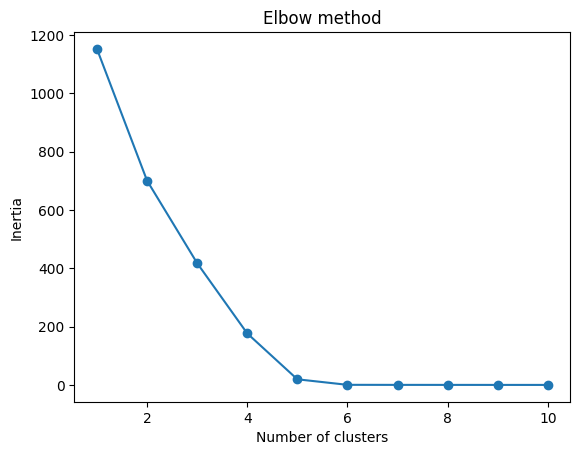

In [17]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(solutions)
    inertias.append(kmeans.inertia_)
    
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show();

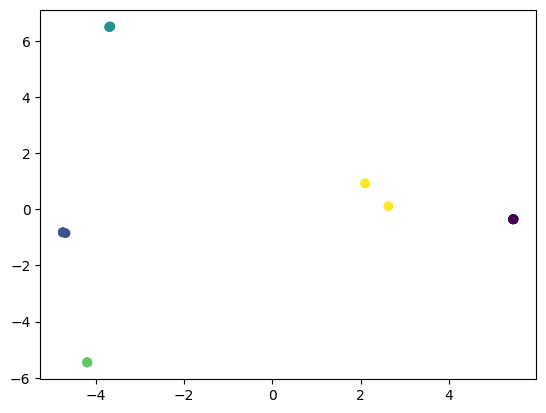

In [63]:
# KMeans clustering with n_clusters based on elbow method
kmeans = KMeans(n_clusters=5)
kmeans.fit(solutions)

# PCA transformation for visualization, not for fitting KMeans
pca = PCA(2)
solutions_transformed = pca.fit_transform(solutions)

# Show plot
plt.scatter(solutions_transformed[:,0], solutions_transformed[:,1], c=kmeans.labels_)
plt.show()

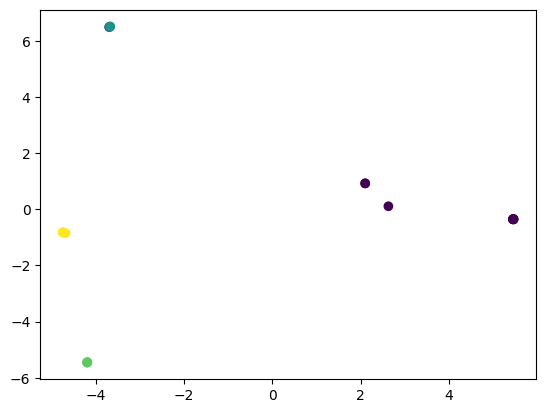

In [61]:

# Distance matrix
dist_matrix = pdist(solutions)

# Hierarchical clustering
Z = linkage(dist_matrix, 'single')

# From hierarchical clustering to flat clustering
Fc = fcluster(Z, t=1, criterion='inconsistent')

# Show plot
plt.scatter(solutions_transformed[:,0], solutions_transformed[:,1], c=Fc)
plt.show()
